In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# modeling module
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

In [67]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
x = df.drop(columns=['math_score'], axis=1)
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [70]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [71]:
numeric_feature = x.select_dtypes(exclude='object').columns

In [72]:
numeric_feature

Index(['reading_score', 'writing_score'], dtype='object')

In [73]:
category_feature = x.select_dtypes(include='object').columns
category_feature

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [102]:
# preprocessing data

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

nt = StandardScaler()
ot = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", ot, category_feature),
    ("StandardScalar", nt, numeric_feature),
])

In [75]:
x = preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [76]:
x.shape

(1000, 19)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [78]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return mae,rmse,r2

In [79]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KN Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Ramdom Forest":RandomForestRegressor(),
    "XGBoost Regressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

In [147]:
# hyperparameter tuning #

params = {
    "Linear Regression":{
        'fit_intercept':[False, True],
        'n_jobs':[1,2,3,4,5],
        'copy_X': [False, True],
        'positive':[False, True]
    },
    "Lasso":[

    ],
    "Ridge":[

    ],
    "KN Regressor":[

    ],
    "Decision Tree":[

    ],
    "Ramdom Forest":[

    ],
    "XGBoost Regressor":[

    ],
    "CatBoost Regressor":[

    ],
    "AdaBoost Regressor":[

    ]

}

In [148]:
list(params.values())[0]
# list(models.values())[0]

{'fit_intercept': [False, True],
 'n_jobs': [1, 2, 3, 4, 5],
 'copy_X': [False, True],
 'positive': [False, True]}

In [156]:
# hyper params tuning

for i in range(1):
    model = list(models.values())[i]
    
    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(model, list(params.values())[i], cv=5)
    grid_search.fit(x_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print(best_model)
    print("Best Hyperparameters:")
    for key, value in best_params.items():
        print(key + ":", value)
    

LinearRegression(copy_X=False, n_jobs=1)
Best Hyperparameters:
copy_X: False
fit_intercept: True
n_jobs: 1
positive: False


In [130]:
# model training

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    mtrn_mae, mtrn_mse, mtrn_r2 = evaluate_model(y_train, y_train_pred)
    mtst_mae, mtst_mse, mtst_r2 = evaluate_model(y_test, y_test_pred)    
    
    M = list(models.keys())[i]
    print(M)
    model_list.append(M)
    
    print("-----------------------------------")
    
    print("Model Performance for Test set")
    print("MAE {:.4f}".format(mtst_mae))
    print("MSE {:.4f}".format(mtst_mse))
    print("R2  {:.4f}".format(mtst_r2))
    
    r2_list.append(mtst_r2)
    print("\n")

Linear Regression
-----------------------------------
Model Performance for Test set
MAE 4.3995
MSE 5.5768
R2  0.8628


Lasso
-----------------------------------
Model Performance for Test set
MAE 5.3566
MSE 6.7021
R2  0.8018


Ridge
-----------------------------------
Model Performance for Test set
MAE 4.3880
MSE 5.5674
R2  0.8632


KN Regressor
-----------------------------------
Model Performance for Test set
MAE 5.5780
MSE 6.9092
R2  0.7893


Decision Tree
-----------------------------------
Model Performance for Test set
MAE 6.3400
MSE 7.9743
R2  0.7194


Ramdom Forest
-----------------------------------
Model Performance for Test set
MAE 4.5447
MSE 5.6163
R2  0.8608


XGBoost Regressor
-----------------------------------
Model Performance for Test set
MAE 5.3012
MSE 6.5922
R2  0.8082


CatBoost Regressor
-----------------------------------
Model Performance for Test set
MAE 4.5164
MSE 5.6766
R2  0.8578


AdaBoost Regressor
-----------------------------------
Model Performance for

Linear Regression
-----------------------------------
Model Performance for Test set
MAE 4.3869
MSE 5.5614
R2  0.8635



---

In [17]:
model_op = pd.DataFrame(list(zip(models.keys(), r2_list)), columns=['model', 'r2_score']).sort_values(by='r2_score', ascending=False)
model_op

,model,r2_score
2,Ridge,0.863213
0,Linear Regression,0.862754
5,Ramdom Forest,0.857834
7,CatBoost Regressor,0.857797
8,AdaBoost Regressor,0.827998
6,XGBoost Regressor,0.808223
1,Lasso,0.801773
3,KN Regressor,0.789334
4,Decision Tree,0.756665


## Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
score_lr = r2_score(y_test, y_pred_lr)
print('Accuracy of {} is {}'.format(lr, score_lr))

Accuracy of LinearRegression() is 0.8627540508435806


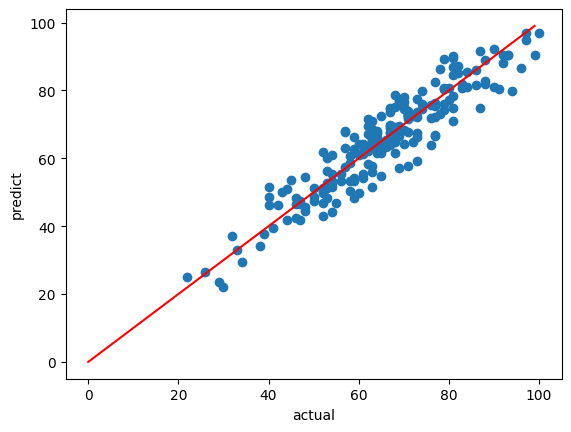

In [19]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("actual")
plt.ylabel("predict")

# plottig a diagonal line
n = np.arange(0,100)
plt.plot(n,n, color='red')

plt.show()

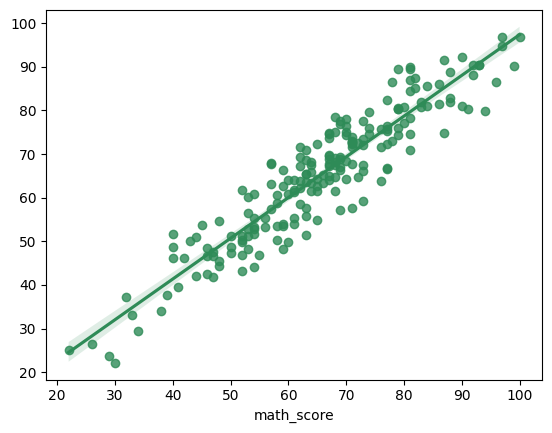

In [20]:
sns.regplot(x=y_test, y=y_pred_lr, color='seagreen')
plt.show()

In [21]:
df_lr = pd.DataFrame({'Actual':y_test, 'Predict':y_pred_lr, 'Difference':y_test-y_pred_lr}).sort_values(by='Difference')
df_lr

,Actual,Predict,Difference
844,40,51.664062,-11.664062
918,57,67.929688,-10.929688
698,57,67.648438,-10.648438
751,68,78.585938,-10.585938
982,79,89.398438,-10.398438
...,...,...,...
767,76,63.867188,12.132812
859,87,74.835938,12.164062
520,71,57.687500,13.312500
279,73,59.250000,13.750000
